In [1]:
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange, reduce, repeat

In [2]:
img = []
# create 5 * 5 blocks, each blocks 5 * 5 pixels gray image
for i in range(5 * 5):
     img.append([i*10] * 25)

In [3]:
img = np.asarray(img)
img = img.reshape(5, 5, 5, 5)
img = rearrange(img, "Y X H W -> (Y H) (X W)")
img.shape

(25, 25)

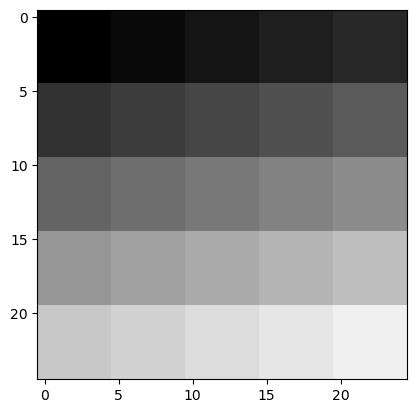

In [4]:
img = np.expand_dims(img, -1)
img = np.repeat(img, 3, axis=-1)
plt.imshow(img)

# einops.rearrange

In [5]:
img.shape

(25, 25, 3)

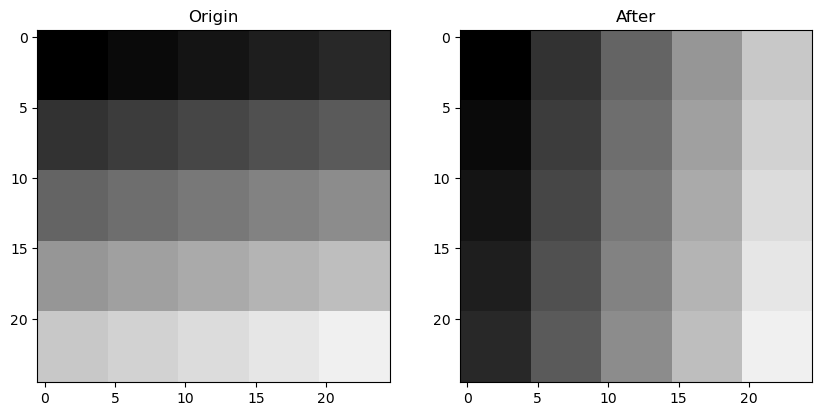

In [6]:
# 可以交换通道
this_img = rearrange(img, "H W C -> W H C")
_, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img)
axes[0].set_title('Origin')
axes[1].imshow(this_img)
axes[1].set_title('After')
plt.show()

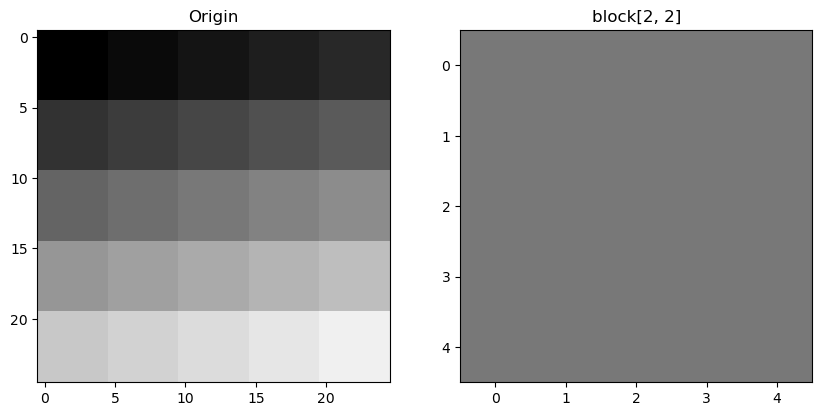

In [7]:
# 拆分成多个子图
this_img = rearrange(img, "(A H) (B W) C -> A B H W C", A=5, B=5)
_, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img)
axes[0].set_title('Origin')
axes[1].imshow(this_img[2, 2, :, :, :])
axes[1].set_title('block[2, 2]')
plt.show()

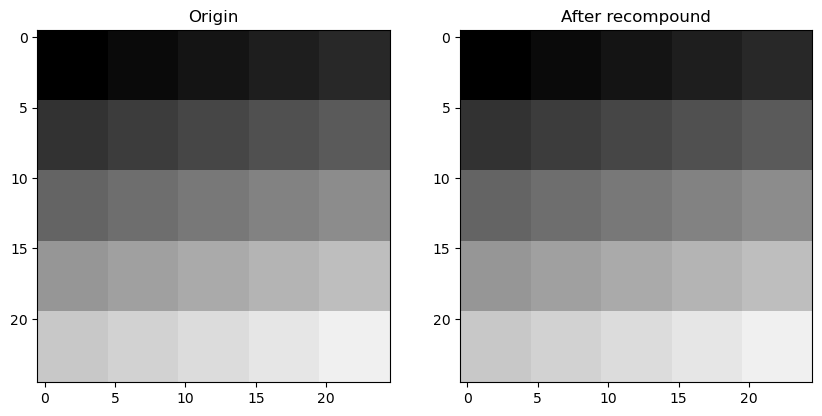

In [8]:
this_img = rearrange(img, "(A H) (B W) C -> A B H W C", A=5, B=5)
# 将上面拆分的多个子图合成
this_img = rearrange(this_img, "A B H W C -> (A H) (B W) C", A=5, B=5)
_, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img)
axes[0].set_title('Origin')
axes[1].imshow(this_img)
axes[1].set_title('After recompound')
plt.show()

# einops.reduce

In [9]:
batch_img = np.asarray([img, img.transpose(1, 0, 2)])
batch_img.shape

(2, 25, 25, 3)

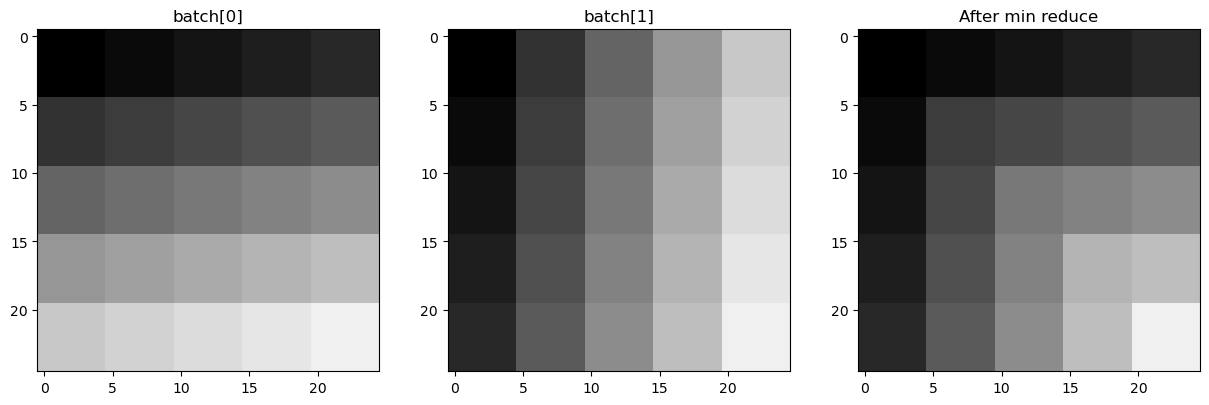

In [10]:
this_img = reduce(batch_img, "B H W C -> H W C", "min")
_, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(batch_img[0])
axes[0].set_title('batch[0]')
axes[1].imshow(batch_img[1])
axes[1].set_title('batch[1]')
axes[2].imshow(this_img)
axes[2].set_title('After min reduce')
plt.show()

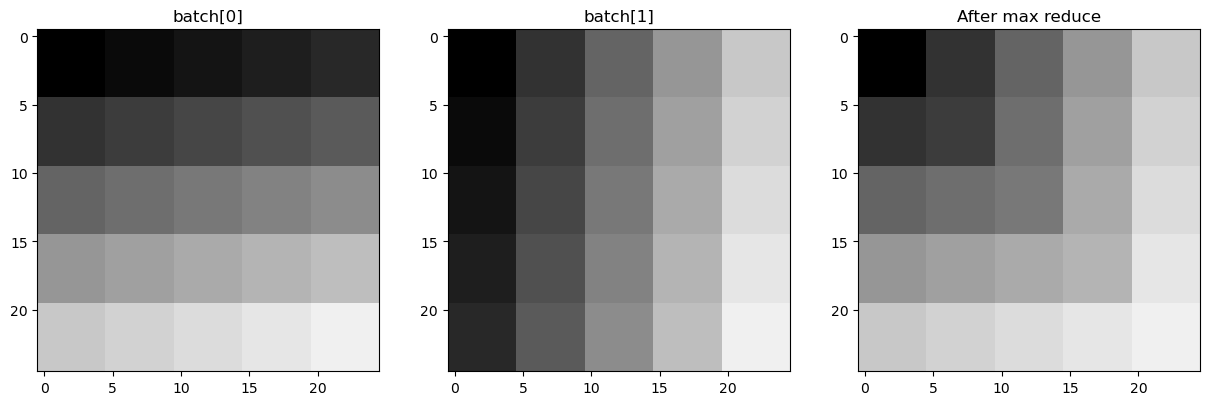

In [11]:
this_img = reduce(batch_img, "B H W C -> H W C", "max")
_, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(batch_img[0])
axes[0].set_title('batch[0]')
axes[1].imshow(batch_img[1])
axes[1].set_title('batch[1]')
axes[2].imshow(this_img)
axes[2].set_title('After max reduce')
plt.show()

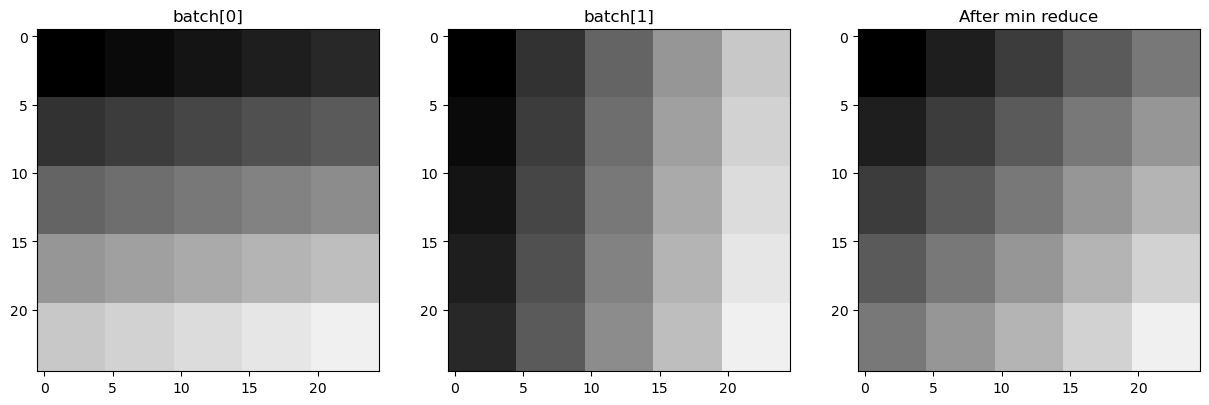

In [12]:
this_img = reduce(batch_img.astype(np.float32) / 255, "B H W C -> H W C", "mean")
_, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(batch_img[0])
axes[0].set_title('batch[0]')
axes[1].imshow(batch_img[1])
axes[1].set_title('batch[1]')
axes[2].imshow(this_img)
axes[2].set_title('After min reduce')
plt.show()

# einops.repeat

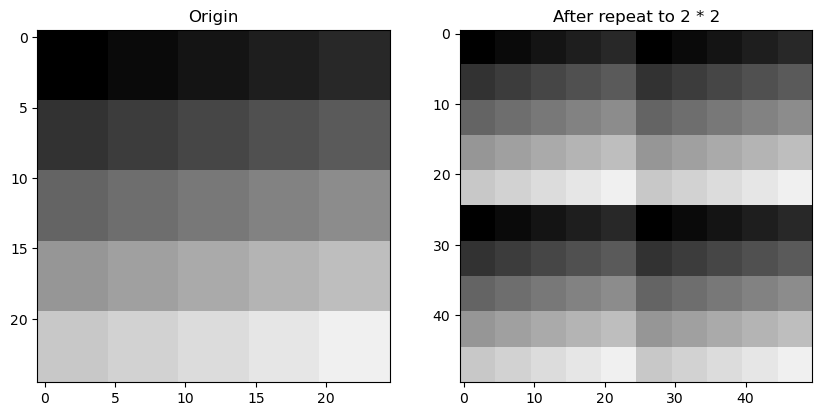

In [13]:
repeat_img = repeat(img, "H W C -> (A H) (B W) C", A=2, B=2)
_, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img)
axes[0].set_title('Origin')
axes[1].imshow(repeat_img)
axes[1].set_title('After repeat to 2 * 2')
plt.show()